# 6.5 Unsupervised Machine Learning - Clustering

## This script contains the following:
### 1. Importing libraries and data
### 2. KModes clustering algorithm for Categorical data
#### 2.1. Scree Plot or Elbow Curve to Find Optimal Kvalue 
### 3. Build a Model with 2 Clusters
### 4. Cluster identification
### 5. Finding a frequency of each value across a dataframe
### 6. Visualization
### 7. Exporting data

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
!pip install kmodes
from kmodes.kmodes import KModes
import pylab as pl
import folium
import json

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter'

In [4]:
# Check path

path

'C:\\Users\\Asus\\OneDrive\\Documents\\Data Analytics\\Data Immersion\\6. Advanced Analytics and Dashboard Design\\Search and rescue helicopter'

In [5]:
# Insert data

df_sarh0112 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sarh0112_final.pkl'))

In [6]:
# Checking data

df_sarh0112.head()

,Day_of_week,Name_of_the_Base,Type_of_tasking,Tasking_location,Region,Latitude,Longitude,Time_of_day,Tasking_duration,MonthYear,Tasking_complnotcompl
0,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Highlands and Islands,61.47,1.53,6:00pm - 8:59pm,2,04/2015,Yes
1,Wednesday,Sumburgh,Rescue/Recovery,Land,Highlands and Islands,59.25,-2.58,6.00am - 8.59am,2,04/2015,Yes
2,Wednesday,Inverness,Support,Land,Highlands and Islands,56.79,-4.99,9:00am - 11:59am,3,04/2015,Yes
3,Wednesday,Inverness,Support,Land,Highlands and Islands,56.79,-5.06,12:00pm - 2:59pm,4,04/2015,Yes
4,Thursday,Inverness,Rescue/Recovery,Land,Highlands and Islands,56.81,-5.02,6:00pm - 8:59pm,1,04/2015,Yes


In [7]:
# Checking data dimension

df_sarh0112.shape

(19217, 11)

## 2. KModes clustering algorithm for Categorical data

##### KModes is a clustering algorithm used in data science to group similar data points into clusters based on their categorical attributes. Unlike traditional clustering algorithms that use distance metrics, KModes works by identifying the modes or most frequent values within each cluster to determine its centroid. KModes is ideal for clustering categorical data such as customer demographics, market segments, or survey responses. It is a powerful tool for data analysts and scientists to gain insights into their data and make informed decisions.

##### KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance. So we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

##### Unlike Hierarchical clustering methods, we need to upfront specify the K.

- Pick K observations at random and use them as leaders/clusters
- Calculate the dissimilarities and assign each observation to its closest cluster
- Define new modes for the clusters
- Repeat 2–3 steps until there is no re-assignment required

### 2.1. Scree Plot or Elbow Curve to Find Optimal Kvalue

#### For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.
#### Select the K where you observe an elbow-like bend with a lesser cost value.

In [8]:
# find categorical variables

categorical = [var for var in df_sarh0112.columns if df_sarh0112[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['Day_of_week', 'Name_of_the_Base', 'Type_of_tasking', 'Tasking_location', 'Region', 'Time_of_day', 'MonthYear', 'Tasking_complnotcompl']


In [9]:
# Making a subset of only categorical data

df_sarh0112_categ = df_sarh0112[['Day_of_week', 'Name_of_the_Base', 'Type_of_tasking', 'Tasking_location', 'Region', 'Time_of_day', 'MonthYear', 'Tasking_complnotcompl']]

In [10]:
# Check subset with only categorical values

df_sarh0112_categ.head()

,Day_of_week,Name_of_the_Base,Type_of_tasking,Tasking_location,Region,Time_of_day,MonthYear,Tasking_complnotcompl
0,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Highlands and Islands,6:00pm - 8:59pm,04/2015,Yes
1,Wednesday,Sumburgh,Rescue/Recovery,Land,Highlands and Islands,6.00am - 8.59am,04/2015,Yes
2,Wednesday,Inverness,Support,Land,Highlands and Islands,9:00am - 11:59am,04/2015,Yes
3,Wednesday,Inverness,Support,Land,Highlands and Islands,12:00pm - 2:59pm,04/2015,Yes
4,Thursday,Inverness,Rescue/Recovery,Land,Highlands and Islands,6:00pm - 8:59pm,04/2015,Yes


### Elbow Curve

In [11]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_sarh0112_categ)
    cost.append(kmode.cost_)
    

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 100345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 100345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 100345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 100345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 100345.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3354, cost: 93999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3029, cost: 91013.0
Run 2, iteration: 2/100, moves: 70, cost: 91013.0
Init: initiali

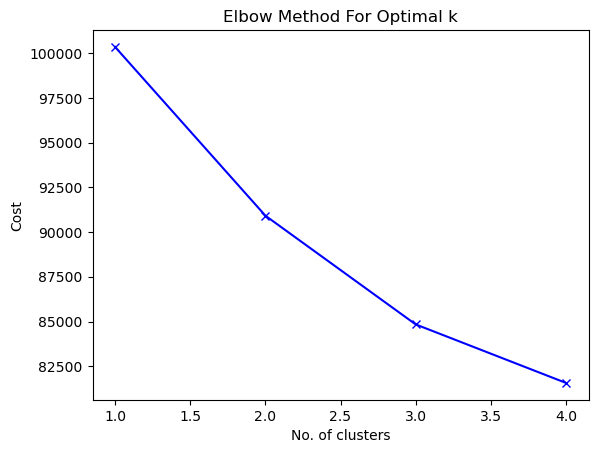

In [12]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

#### We can see a bend at K = 2 in the above graph indicating 2 is the optimal number of clusters.

## 3. Build a Model with 2 Clusters

In [13]:
# Building the model with 2 clusters

kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_sarh0112_categ)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3457, cost: 92025.0
Run 1, iteration: 2/100, moves: 1928, cost: 92025.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2149, cost: 94071.0
Run 2, iteration: 2/100, moves: 1152, cost: 93768.0
Run 2, iteration: 3/100, moves: 296, cost: 93768.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5335, cost: 89510.0
Run 3, iteration: 2/100, moves: 201, cost: 89510.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3211, cost: 93053.0
Run 4, iteration: 2/100, moves: 103, cost: 93053.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3342, cost: 89220.0
Run 5, iteration: 2/100, moves: 57, cost: 89220.0
Best run was number 5


array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [14]:
#  Insert the predicted cluster values in our original dataset.

df_sarh0112_categ.insert(0, "Cluster", clusters, True)
df_sarh0112_categ

,Cluster,Day_of_week,Name_of_the_Base,Type_of_tasking,Tasking_location,Region,Time_of_day,MonthYear,Tasking_complnotcompl
0,0,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Highlands and Islands,6:00pm - 8:59pm,04/2015,Yes
1,0,Wednesday,Sumburgh,Rescue/Recovery,Land,Highlands and Islands,6.00am - 8.59am,04/2015,Yes
2,0,Wednesday,Inverness,Support,Land,Highlands and Islands,9:00am - 11:59am,04/2015,Yes
3,0,Wednesday,Inverness,Support,Land,Highlands and Islands,12:00pm - 2:59pm,04/2015,Yes
4,0,Thursday,Inverness,Rescue/Recovery,Land,Highlands and Islands,6:00pm - 8:59pm,04/2015,Yes
...,...,...,...,...,...,...,...,...,...
19212,1,Friday,Newquay,Search Only,Maritime,South West,3:00am - 5:59am,03/2023,Yes
19213,0,Friday,Caernarfon,Rescue/Recovery,Land,North West,12:00pm - 2:59pm,03/2023,Yes
19214,0,Friday,Inverness,Rescue/Recovery,Land,Highlands and Islands,12:00pm - 2:59pm,03/2023,Yes
19215,1,Friday,Newquay,Rescue/Recovery,Coast,South West,3:00pm - 5:59pm,03/2023,Yes


In [15]:
print(kmode.cluster_centroids_)

[['Sunday' 'Prestwick' 'Rescue/Recovery' 'Land' 'Highlands and Islands'
  '12:00pm - 2:59pm' '08/2020' 'Yes']
 ['Saturday' 'Newquay' 'Rescue/Recovery' 'Coast' 'South West'
  '3:00pm - 5:59pm' '08/2016' 'Yes']]


## 4. Cluster identification

In [16]:
cluster_0 = df_sarh0112_categ[df_sarh0112_categ['Cluster'] == 0]
cluster_1 = df_sarh0112_categ[df_sarh0112_categ['Cluster'] == 1]

In [17]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13079 entries, 0 to 19214
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cluster                13079 non-null  uint16
 1   Day_of_week            13079 non-null  object
 2   Name_of_the_Base       13079 non-null  object
 3   Type_of_tasking        13079 non-null  object
 4   Tasking_location       13079 non-null  object
 5   Region                 13079 non-null  object
 6   Time_of_day            13079 non-null  object
 7   MonthYear              13079 non-null  object
 8   Tasking_complnotcompl  13079 non-null  object
dtypes: object(8), uint16(1)
memory usage: 945.2+ KB


In [18]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6138 entries, 19 to 19216
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cluster                6138 non-null   uint16
 1   Day_of_week            6138 non-null   object
 2   Name_of_the_Base       6138 non-null   object
 3   Type_of_tasking        6138 non-null   object
 4   Tasking_location       6138 non-null   object
 5   Region                 6138 non-null   object
 6   Time_of_day            6138 non-null   object
 7   MonthYear              6138 non-null   object
 8   Tasking_complnotcompl  6138 non-null   object
dtypes: object(8), uint16(1)
memory usage: 443.6+ KB


### Name_of_the_Base 

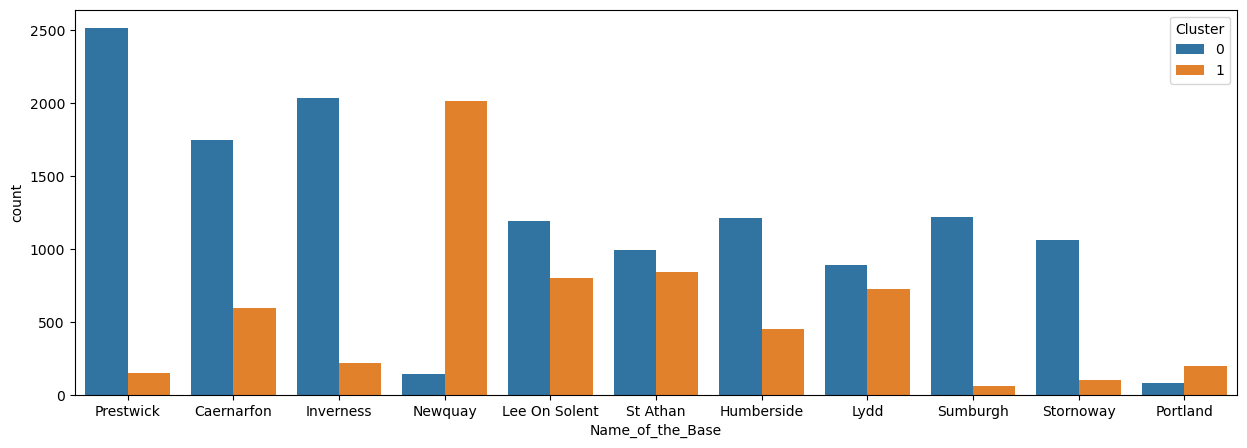

In [19]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_sarh0112_categ['Name_of_the_Base'],order=df_sarh0112_categ['Name_of_the_Base'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Type_of_tasking

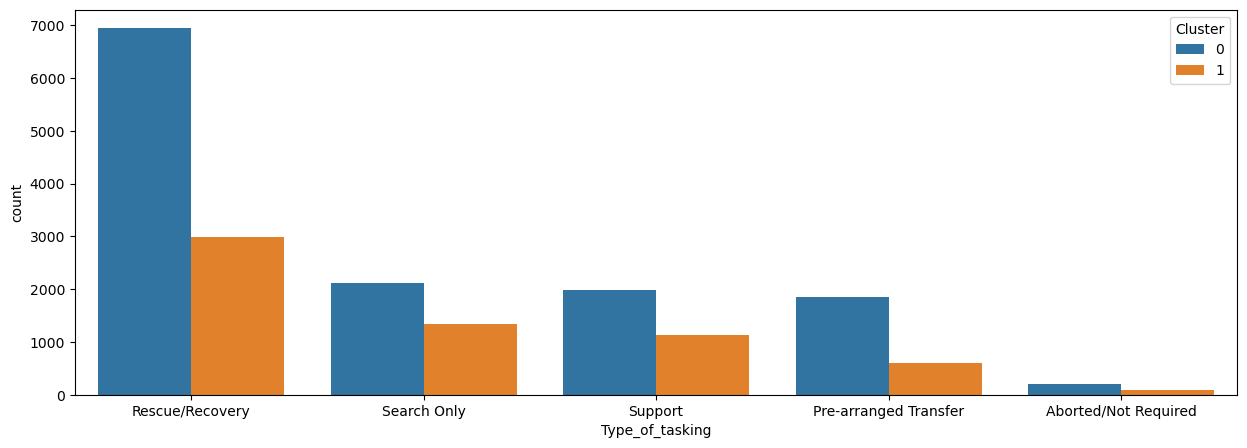

In [20]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_sarh0112_categ['Type_of_tasking'],order=df_sarh0112_categ['Type_of_tasking'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Tasking_location

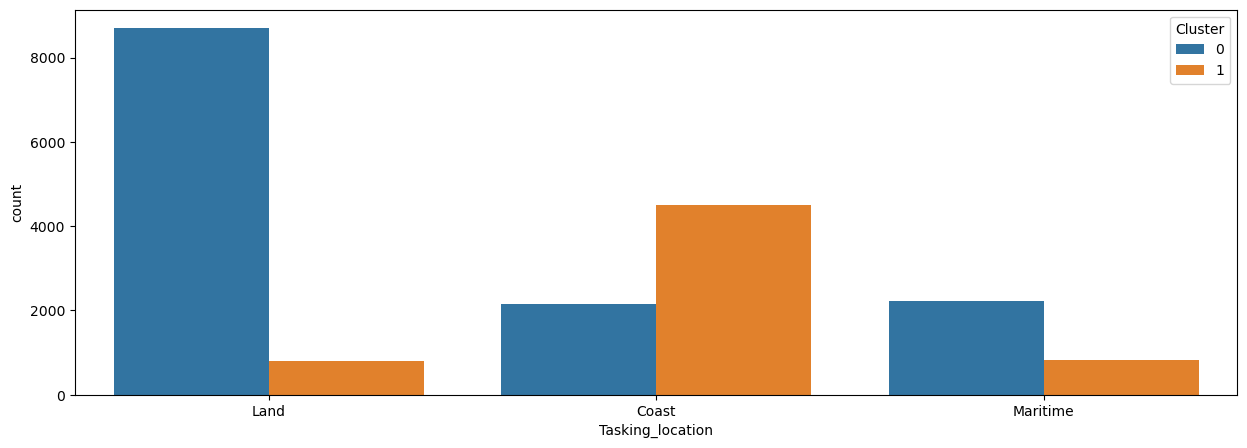

In [21]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_sarh0112_categ['Tasking_location'],order=df_sarh0112_categ['Tasking_location'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Region

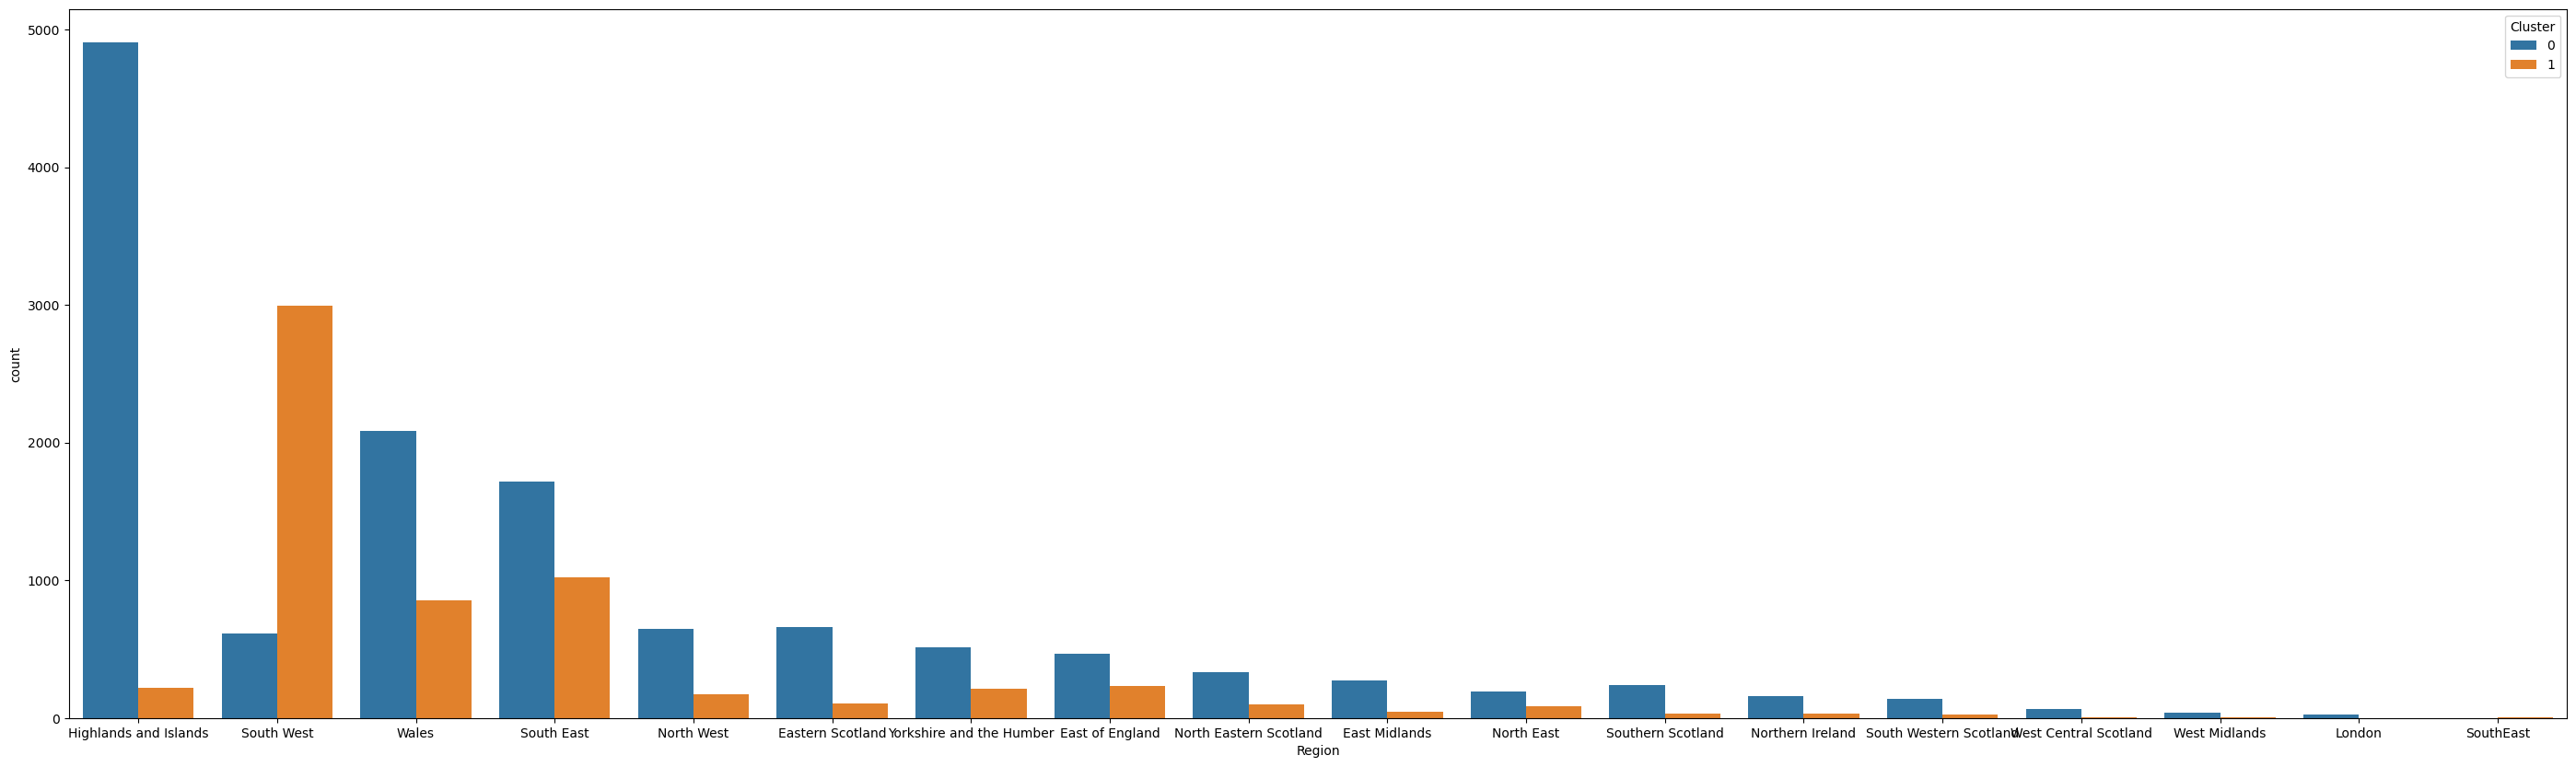

In [22]:
plt.subplots(figsize = (35,10))
sns.countplot(x=df_sarh0112_categ['Region'],order=df_sarh0112_categ['Region'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Time_of_day

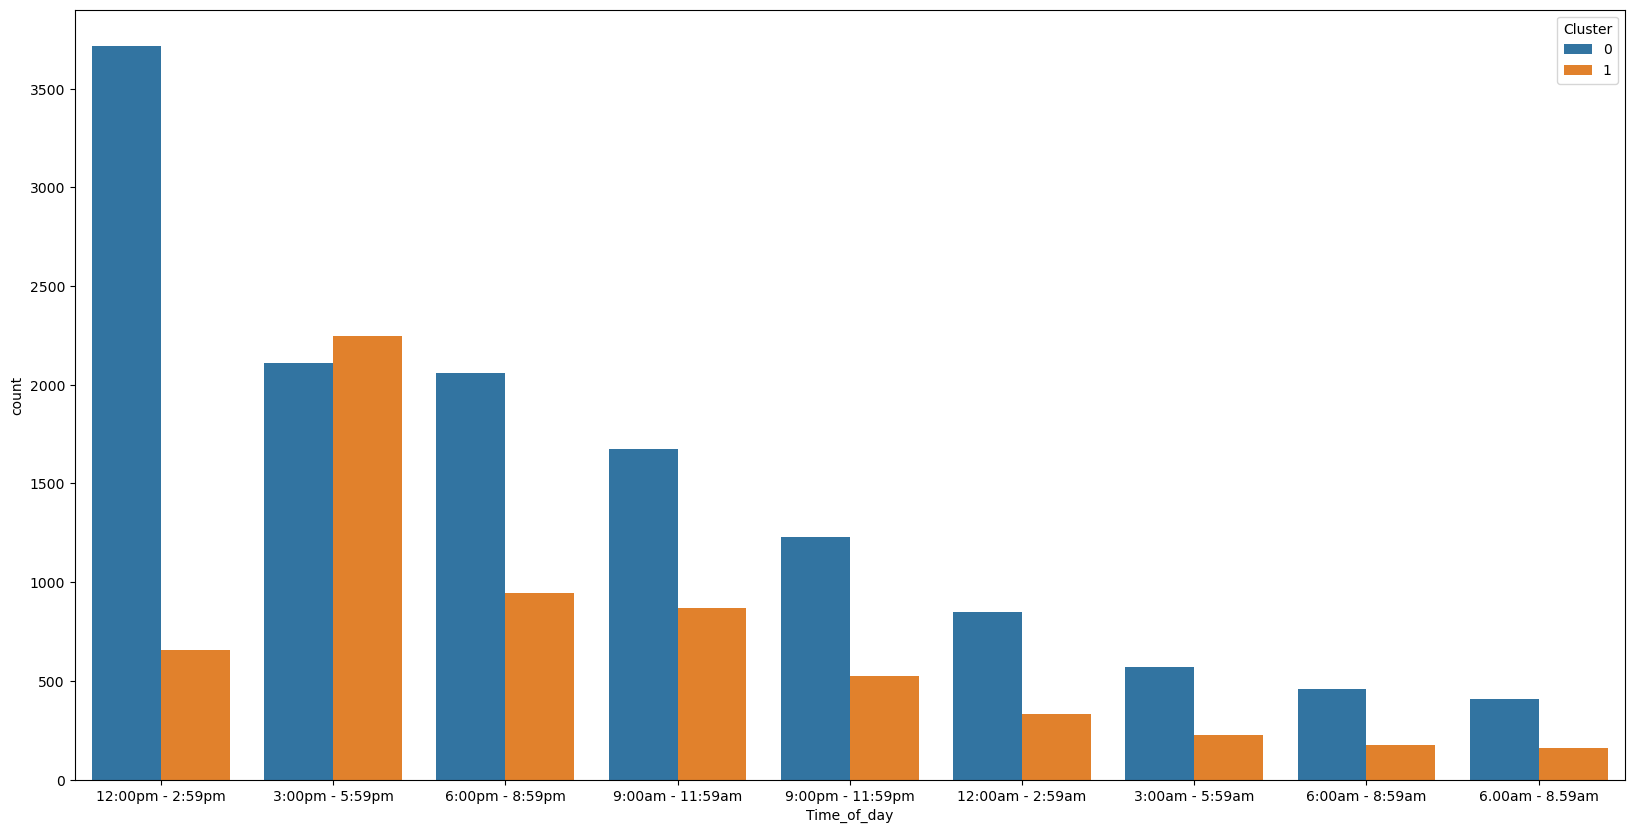

In [23]:
plt.subplots(figsize = (20,10))
sns.countplot(x=df_sarh0112_categ['Time_of_day'],order=df_sarh0112_categ['Time_of_day'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Day_of_week

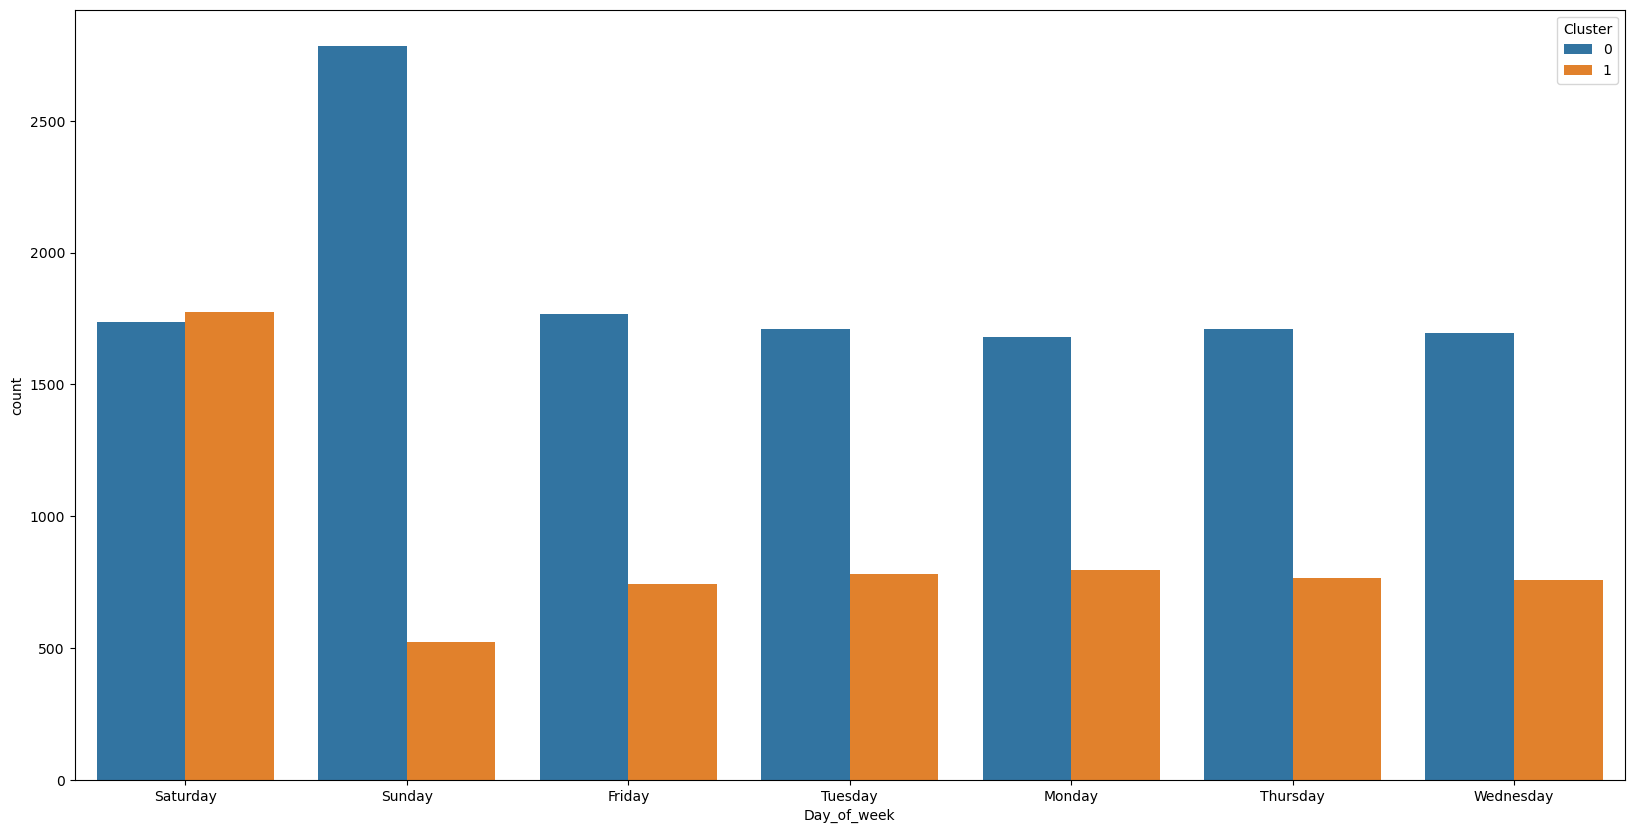

In [24]:
plt.subplots(figsize = (20,10))
sns.countplot(x=df_sarh0112_categ['Day_of_week'],order=df_sarh0112_categ['Day_of_week'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

### Tasking_complnotcompl

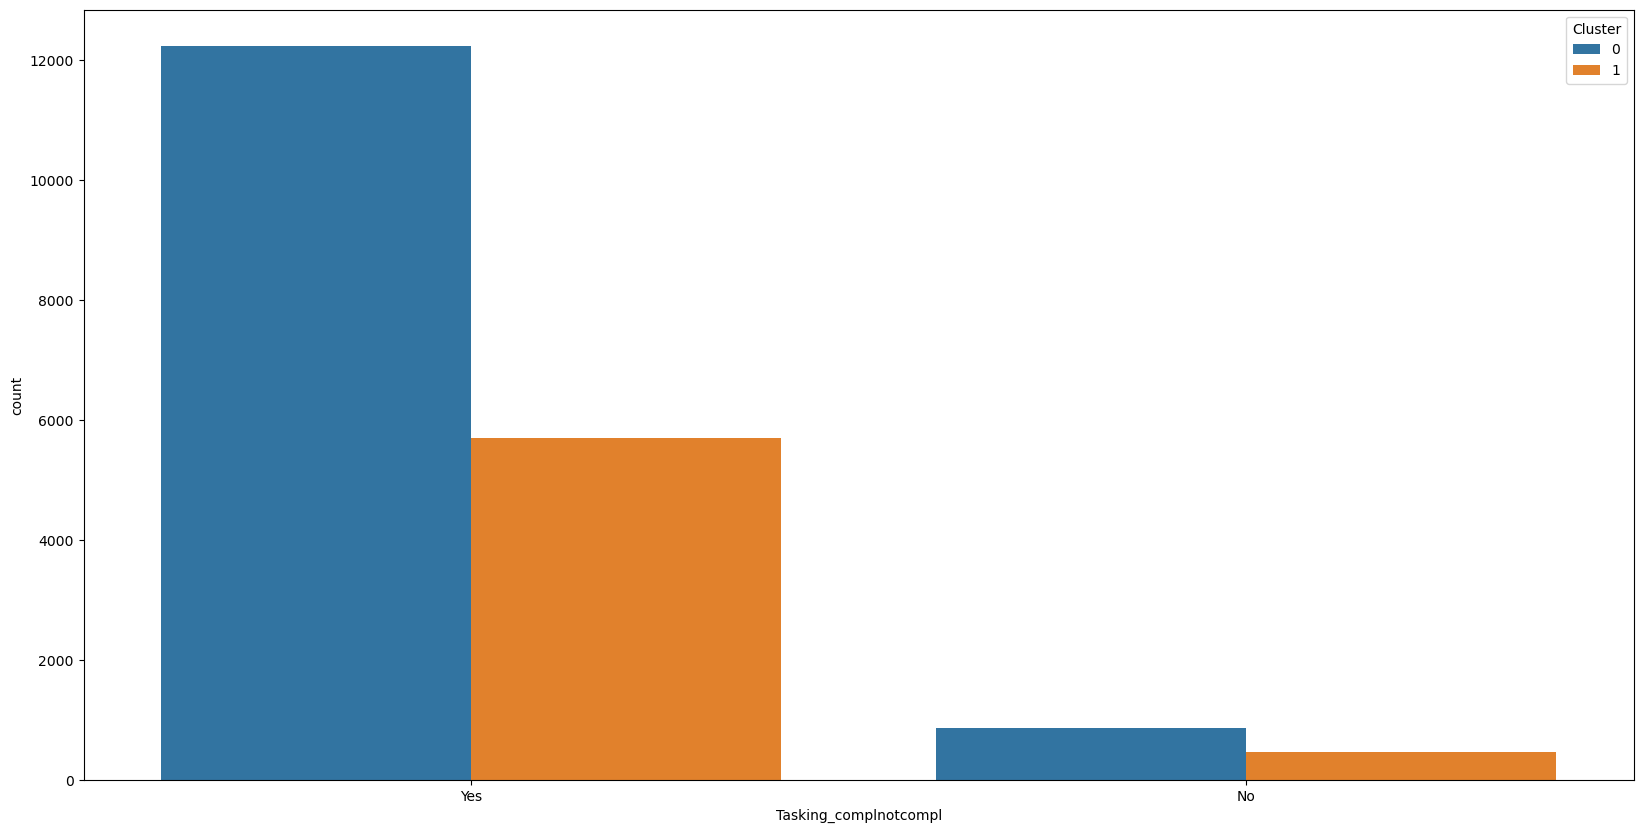

In [25]:
plt.subplots(figsize = (20,10))
sns.countplot(x=df_sarh0112_categ['Tasking_complnotcompl'],order=df_sarh0112_categ['Tasking_complnotcompl'].value_counts().index,hue=df_sarh0112_categ['Cluster'])
plt.show()

#### Changing a Variable's Data Type

In [26]:
# Changing a variable's data type

df_sarh0112_categ['Cluster'] = df_sarh0112_categ['Cluster'].astype('O')

C:\Users\Asus\AppData\Local\Temp\ipykernel_25800\160031259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sarh0112_categ['Cluster'] = df_sarh0112_categ['Cluster'].astype('O')


In [27]:
# Check dtype

df_sarh0112_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19217 entries, 0 to 19216
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cluster                19217 non-null  object
 1   Day_of_week            19217 non-null  object
 2   Name_of_the_Base       19217 non-null  object
 3   Type_of_tasking        19217 non-null  object
 4   Tasking_location       19217 non-null  object
 5   Region                 19217 non-null  object
 6   Time_of_day            19217 non-null  object
 7   MonthYear              19217 non-null  object
 8   Tasking_complnotcompl  19217 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


## 5. Finding a frequency of each value across a dataframe

In [28]:
# Finding frequency of each values across a dataframe

s=pd.get_dummies(df_sarh0112_categ).sum(0).to_frame('Freq').reset_index()
s=s['index'].str.split('\_(?=[A-Z0-9]+$)', expand=True).join(s.iloc[:,-1]).rename(columns={0:'Column',1:'Value'})

C:\Users\Asus\AppData\Local\Temp\ipykernel_25800\2150498877.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  s=pd.get_dummies(df_sarh0112_categ).sum(0).to_frame('Freq').reset_index()


In [29]:
# Check s

s

,Column,Value,Freq
0,Cluster,0,13079
1,Cluster,1,6138
2,Day_of_week_Friday,None,2507
3,Day_of_week_Monday,None,2477
4,Day_of_week_Saturday,None,3511
...,...,...,...
148,MonthYear_12/2020,None,139
149,MonthYear_12/2021,None,158
150,MonthYear_12/2022,None,179
151,Tasking_complnotcompl_No,None,1306


In [30]:
# Frequency of Day_of_week by Clusters

pd.crosstab(index=df_sarh0112_categ['Day_of_week'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Day_of_week,,
Friday,1766,741
Monday,1681,796
Saturday,1735,1776
Sunday,2783,521
Thursday,1710,766
Tuesday,1711,782
Wednesday,1693,756


In [31]:
# Total frequency of Day_of_week by Clusters

pd.crosstab(index=['Day_of_week'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Day_of_week,13079,6138


In [32]:
# Frequency of Name_of_the_Base by Clusters

pd.crosstab(index=df_sarh0112_categ['Name_of_the_Base'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Name_of_the_Base,,
Caernarfon,1747,595
Humberside,1212,451
Inverness,2034,217
Lee On Solent,1188,802
Lydd,892,725
Newquay,144,2012
Portland,78,194
Prestwick,2516,145
St Athan,992,840


In [33]:
# Total frequency of Name_of_the_Base by Clusters

pd.crosstab(index=['Name_of_the_Base'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Name_of_the_Base,13079,6138


In [34]:
# Frequency of Type_of_tasking by Clusters

pd.crosstab(index=df_sarh0112_categ['Type_of_tasking'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Type_of_tasking,,
Aborted/Not Required,197,93
Pre-arranged Transfer,1849,604
Rescue/Recovery,6950,2979
Search Only,2107,1335
Support,1976,1127


In [35]:
# Total frequency of Type_of_tasking by Clusters

pd.crosstab(index=['Type_of_tasking'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Type_of_tasking,13079,6138


In [36]:
# Frequency of Tasking_location by Clusters

pd.crosstab(index=df_sarh0112_categ['Tasking_location'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Tasking_location,,
Coast,2160,4510
Land,8704,807
Maritime,2215,821


In [37]:
# Total frequency of Tasking_location by Clusters

pd.crosstab(index=['Tasking_location'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Tasking_location,13079,6138


In [38]:
# Frequency of Region by Clusters

pd.crosstab(index=df_sarh0112_categ['Region'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Region,,
East Midlands,271,42
East of England,464,231
Eastern Scotland,659,104
Highlands and Islands,4905,222
London,28,1
North East,193,86
North Eastern Scotland,334,99
North West,644,170
Northern Ireland,161,32


In [39]:
# Total frequency of Region by Clusters

pd.crosstab(index=['Region'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Region,13079,6138


In [40]:
# Frequency of Time_of_day by Clusters

pd.crosstab(index=df_sarh0112_categ['Time_of_day'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Time_of_day,,
12:00am - 2:59am,851,333
12:00pm - 2:59pm,3715,654
3:00am - 5:59am,572,226
3:00pm - 5:59pm,2112,2247
6.00am - 8.59am,408,162
6:00am - 8:59am,457,173
6:00pm - 8:59pm,2061,945
9:00am - 11:59am,1673,871
9:00pm - 11:59pm,1230,527


In [41]:
# Total frequency of Time_of_day by Clusters

pd.crosstab(index=['Time_of_day'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Time_of_day,13079,6138


In [42]:
# Frequency of MonthYear by Clusters

pd.crosstab(index=df_sarh0112_categ['MonthYear'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
MonthYear,,
01/2016,121,39
01/2017,112,43
01/2018,131,39
01/2019,91,55
01/2020,108,49
...,...,...
12/2018,106,49
12/2019,133,36
12/2020,92,47


In [43]:
# Total frequency of MonthYear by Clusters

pd.crosstab(index=['MonthYear'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
MonthYear,13079,6138


In [44]:
# Frequency of Tasking_complnotcompl by Clusters

pd.crosstab(index=df_sarh0112_categ['Tasking_complnotcompl'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
Tasking_complnotcompl,,
No,854,452
Yes,12225,5686


In [45]:
# Total frequency of Tasking_complnotcompl by Clusters

pd.crosstab(index=['Tasking_complnotcompl'], columns=[df_sarh0112_categ.Cluster])

Cluster,0,1
row_0,,
Tasking_complnotcompl,13079,6138


## 6. Visualization

In [46]:
# Import ".json" file for the UK

uk_geo = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter\02 Data\Prepared Data\uk_regions.json'

In [47]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter\02 Data\Prepared Data\uk_regions.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-2.03, 55.77], [-2.02, 55.77], [-2.03, 55.77], [-2.04, 55.76], [-2.05, 55.76], [-2.07, 55.76], [-2.09, 55.76], [-2.24, 55.65], [-2.33, 55.63], [-2.31, 55.62], [-2.23, 55.52], [-2.2, 55.48], [-2.18, 55.47], [-2.33, 55.41], [-2.34, 55.39], [-2.33, 55.39], [-2.34, 55.39], [-2.33, 55.39], [-2.34, 55.37], [-2.64, 55.26], [-2.63, 55.25], [-2.63, 55.23], [-2.69, 55.19], [-2.53, 55.08], [-2.53, 55.09], [-2.53, 55.08], [-2.53, 55.09], [-2.52, 55.09], [-2.5, 55.09], [-2.49, 55.09], [-2.5, 55.09], [-2.49, 55.09], [-2.5, 55.07], [-2.51, 55.04], [-2.51, 55.03], [-2.51, 55.04], [-2.51, 55.03], [-2.6, 54.97], [-2.6, 54.96], [-2.6, 54.97], [-2.6, 54.96], [-2.41, 54.85], [-2.33, 54.81], [-2.33, 54.8], [-2.33, 54.81], [-2.33, 54.8], [-2.33, 54.81], [-2.33, 54.8], [-2.34, 54.71], [-2.35, 54.7], [-2.16, 54.46], [-2.17, 54.46], [-2.16, 54.46], [-1.79, 54.49], [-1.66, 54.53], [-1.64, 54.52], [-1.59, 54.51], [-1.58, 54.51], [-1.59, 5

In [48]:
# Create a data frame with just the coordinates and the values for tasking duration we want plotted

data_to_plot = df_sarh0112_categ[['Region', 'Cluster']]
data_to_plot.head()

,Region,Cluster
0,Highlands and Islands,0
1,Highlands and Islands,0
2,Highlands and Islands,0
3,Highlands and Islands,0
4,Highlands and Islands,0


In [49]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations

folium.Choropleth(
    geo_data = uk_geo,
    data = data_to_plot,
    columns = ['Region', 'Cluster'],
    key_on = 'feature.properties.rgn19nm',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Cluster").add_to(map)
folium.LayerControl().add_to(map)

map

In [50]:
# Saving the map

map.save('plot.data.html')

## 7. Exporting data

In [51]:
# Exporting data

df_sarh0112_categ.to_csv(os.path.join(path,'02 Data','Prepared Data','sarh_0112_final.csv'))

In [52]:
# Exporting data

df_sarh0112_categ.to_excel(os.path.join(path,'02 Data','Prepared Data','sarh_0112_final.xlsx'))